# Кейc №2 - Задача классификации 

#### Выбираем метод моделирования 

В данной работе производится машинное обучение с помощью трех методов. Метод "Логистическая регрессия", метод "Дерево решений" и метод "Случайный лес". Задача: проанализировать данные методы с целью получения наибольшей точности предсказания.

#### Выбираем метрику оценивания. 

В нашем случае наилучшим вариантом будет <b>PRECISION</b>. Почему? Потому что таким образом мы исключаем упущенную выгоду. При звонке мы будем с большей вероятностью уверены, что нам ответит человек, готовый оформить дебетовую карту (По простому ошибка звучит так (FP): Мы заранее предполагаем, что клиент откажется от нашей услуги, в то время, как на самом деле он согласится)

## Загрузка данных

***Импортируем библиотеки***

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

***Загружаем датасет***

In [2]:
df_bank = pd.read_csv('bank.csv', sep = ';')
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


## ***Выполняем необходимые проверки***

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df_bank.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1844,54,management,married,tertiary,no,8295,no,no,cellular,5,jun,207,1,-1,0,unknown,yes
3827,51,management,married,tertiary,no,-892,yes,yes,cellular,14,aug,248,2,-1,0,unknown,no
1651,45,blue-collar,married,primary,no,1291,yes,no,cellular,28,aug,189,17,-1,0,unknown,no
586,32,self-employed,single,secondary,no,518,yes,no,cellular,18,may,34,7,-1,0,unknown,no
2918,29,admin.,single,tertiary,no,14,no,no,cellular,29,sep,87,1,120,1,failure,no


In [5]:
df_bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df_bank['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [8]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# ***Обработка входных данных***

Создаем копию датафрейма

In [9]:
#Final_Credit_Result = df_bank['y']
df_bank_train = df_bank.copy()

<b>Атрибут duration</b> - этот атрибут влияет на цель вывода (например, если duration = 0, то y = no). Duration - продожительность звонка - неизвестна до совершения вызова. 

Кроме того, после окончания вызова <b>y</b>, очевидно, известен. Таким образом, этот вклад должен быть включен только <b>для целей эталонных показателей</b> и должен быть отброшен, если намерение состоит в том, <b>чтобы иметь реалистичную прогнозную модель.</b>



In [10]:
#df_bank_train = df_bank_train.drop('y', axis = 1)
df_bank_train = df_bank_train.drop('duration' , axis = 1)
df_bank_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,4,211,3,other,no


<b>Атрибут pdays</b> - кол-во дней, прошедших после последнего контака с клиентом. Значение -1 означает, что прежде с данным контактом связь не поддерживается. Проверим кол-во подобных клиентов

In [11]:
df_bank_train['pdays'] = df_bank_train['pdays'].replace(-1, np.nan) # Используем метод .replace для замены '-1' на 'NaN' (Not-a-Number)
df_bank_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,NaN,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339.0,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330.0,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,NaN,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,NaN,0,unknown,no


In [12]:
df_bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   int64  
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   int64  
 10  month      4521 non-null   object 
 11  campaign   4521 non-null   int64  
 12  pdays      816 non-null    float64
 13  previous   4521 non-null   int64  
 14  poutcome   4521 non-null   object 
 15  y          4521 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory usage: 565.2+ KB


Как видно, больше 80% данных имеет значение -1 => удаляем столбец

In [13]:
df_bank_train = df_bank_train.drop('pdays' , axis = 1)
df_bank_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,5,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,11,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,4,3,other,no


Как видно из таблицы некотрые столбцы имеют неопределенные данные <b>unknown</b>. Проведем процедуру проверки, изаменим неопределенные данные на пустые ячейки

In [14]:
df_bank_train_unknown_check = df_bank_train.copy()

In [15]:
df_bank_train_unknown_check = df_bank_train_unknown_check.replace('unknown', np.nan)
df_bank_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,0,unknown,no


In [16]:
df_bank_train_unknown_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4483 non-null   object
 2   marital    4521 non-null   object
 3   education  4334 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    3197 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  campaign   4521 non-null   int64 
 12  previous   4521 non-null   int64 
 13  poutcome   816 non-null    object
 14  y          4521 non-null   object
dtypes: int64(5), object(10)
memory usage: 529.9+ KB


In [17]:
df_poutcome_success = df_bank_train.loc[df_bank_train['poutcome'] == 'success']
df_poutcome_success

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y
49,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,1,1,success,yes
70,37,management,married,tertiary,no,0,no,no,cellular,16,jul,2,3,success,yes
98,36,blue-collar,divorced,secondary,no,2843,no,no,cellular,12,feb,1,1,success,no
110,21,student,single,secondary,no,2488,no,no,cellular,30,jun,6,3,success,yes
156,55,admin.,married,secondary,no,602,no,no,cellular,1,jun,3,2,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,40,services,single,secondary,no,1547,yes,no,cellular,12,may,2,1,success,no
4323,83,retired,divorced,primary,no,0,no,no,telephone,31,may,1,3,success,no
4433,40,management,married,tertiary,no,-17,yes,yes,cellular,11,may,1,1,success,yes
4458,29,management,single,tertiary,no,572,no,no,cellular,16,dec,1,1,success,yes


In [18]:
df_bank_train['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [19]:
df_poutcome_nonexistent = df_bank_train.loc[df_bank_train['poutcome'] == 'nonexistent']
df_poutcome_nonexistent

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y


In [20]:
df_poutcome_failure = df_bank_train.loc[df_bank_train['poutcome'] == 'failure']
df_poutcome_failure

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,1,failure,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,2,3,failure,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,1,2,failure,no
14,31,blue-collar,married,secondary,no,360,yes,yes,cellular,29,jan,1,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485,53,blue-collar,married,primary,no,238,yes,no,cellular,11,may,2,5,failure,no
4489,45,management,married,tertiary,no,6945,no,no,cellular,5,aug,5,3,failure,no
4492,32,technician,single,secondary,no,309,yes,yes,cellular,16,apr,1,3,failure,no
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,3,4,failure,yes


Как видно, <b>Атрибут poutcome</b> имеет наибольшее кол-во подобных пропусков. Данный атрибут определяет результат предыдущего звонка и напрямую зависит от атрибута pdays, а следовательно имеет больше 80% пропущенных данных. Однако несет в себе важный смысл и подразделяется на 4 основных значения, которые на прямую могут влиять на результат последующего звонка. Поэтому решено применить ранговую систему для дальнейшего преобразования данных.

Значение <b>'nonexistent</b>'- вероятнее всего подразумевает, что подобного контакта не сущствует. Следовательно, строки с данными абонентами можно удалить. Кол-во строк такого типа - 0<p>
Значение <b>'failure'</b> - показывает, что результат встречи прошел неудачно. Следовательно, вероятнее всего повторный звонок не увенчается успехом. Значит, подобному контакту присваивается ранг - 0. Кол-во строк такого типа - 490 <p>
Значение <b>'success'</b> - показывает, что предыдущий звонок принес результат компании. Значит, подобный контакт уже является клиентом нашего банка, и вероятнее всего может согласиться на новое рекламное предложение. Такому контакту присваивается ранг - 1. Кол-во строк такого типа - 129 <p>
Значение <b>'unknown'</b> - показывает, что ранее связь с данным клиетом не производилась. Следовательно, дальнейшая связь с данным абонентом будет производиться впервые, а значит определить наверняка - откажет он, или нет, по данному параметру - невозможно, вероятность 50%/50%. Такому контакту присваивается ранг - 0,5.<p>
Значение <b>'other'</b> - незвестное значение, в исходном датафрейме не описано.Такому контакту присваивается ранг - 0.

In [21]:
df_bank_train['poutcome'] = df_bank_train['poutcome'].map({'success': 1, 'unknown': 0.5, 'failure': 0, 'other': 0})
df_bank_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,0,0.5,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,4,0.0,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,1,0.0,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,0,0.5,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,0,0.5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,5,0,0.5,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,1,0,0.5,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,11,0,0.5,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,4,3,0.0,no


In [22]:
df_bank_train['poutcome'].unique()

array([0.5, 0. , 1. ])

Так же,можно обратить внимание, что <b>Атрибут contact</b> имеет несколько пустых строчек, и обозначает тип звонка (на мобильный телефон и домашний). Данный атрибут не несет особой важности, поэтому данный столбец можно безболезненно удалить

In [23]:
df_bank_train = df_bank_train.drop('contact' , axis = 1)
df_bank_train

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,19,oct,1,0,0.5,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,1,4,0.0,no
2,35,management,single,tertiary,no,1350,yes,no,16,apr,1,1,0.0,no
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,4,0,0.5,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,1,0,0.5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,30,jul,5,0,0.5,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,1,0,0.5,no
4518,57,technician,married,secondary,no,295,no,no,19,aug,11,0,0.5,no
4519,28,blue-collar,married,secondary,no,1137,no,no,6,feb,4,3,0.0,no


In [24]:
df_bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   int64  
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   day        4521 non-null   int64  
 9   month      4521 non-null   object 
 10  campaign   4521 non-null   int64  
 11  previous   4521 non-null   int64  
 12  poutcome   4521 non-null   float64
 13  y          4521 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 494.6+ KB


<b>Атрибут loan</b> - показывет, есть ли уже заем (loan - in one time money) у данного человека (Да/Нет)

In [25]:
df_bank_train['loan'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
df_bank_train['loan'] = df_bank_train['loan'].map({'yes': 1, 'no': 0})
df_bank_train

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,0,19,oct,1,0,0.5,no
1,33,services,married,secondary,no,4789,yes,1,11,may,1,4,0.0,no
2,35,management,single,tertiary,no,1350,yes,0,16,apr,1,1,0.0,no
3,30,management,married,tertiary,no,1476,yes,1,3,jun,4,0,0.5,no
4,59,blue-collar,married,secondary,no,0,yes,0,5,may,1,0,0.5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,0,30,jul,5,0,0.5,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,1,9,may,1,0,0.5,no
4518,57,technician,married,secondary,no,295,no,0,19,aug,11,0,0.5,no
4519,28,blue-collar,married,secondary,no,1137,no,0,6,feb,4,3,0.0,no


<b>Атрибут housing</b> - показывет, есть ли уже кредит на недвижимость у данного человека (Да/Нет)

In [27]:
df_bank_train['housing'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
df_bank_train['housing'] = df_bank_train['housing'].map({'yes': 1, 'no': 0})
df_bank_train

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,0,0,19,oct,1,0,0.5,no
1,33,services,married,secondary,no,4789,1,1,11,may,1,4,0.0,no
2,35,management,single,tertiary,no,1350,1,0,16,apr,1,1,0.0,no
3,30,management,married,tertiary,no,1476,1,1,3,jun,4,0,0.5,no
4,59,blue-collar,married,secondary,no,0,1,0,5,may,1,0,0.5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,1,0,30,jul,5,0,0.5,no
4517,57,self-employed,married,tertiary,yes,-3313,1,1,9,may,1,0,0.5,no
4518,57,technician,married,secondary,no,295,0,0,19,aug,11,0,0.5,no
4519,28,blue-collar,married,secondary,no,1137,0,0,6,feb,4,3,0.0,no


<b>Атрибут default</b> - показывет, есть ли уже кредит у данного человека (Да/Нет)

In [29]:
df_bank_train['default'].unique()

array(['no', 'yes'], dtype=object)

In [30]:
df_bank_train['default'] = df_bank_train['default'].map({'yes': 1, 'no': 0})
df_bank_train

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,19,oct,1,0,0.5,no
1,33,services,married,secondary,0,4789,1,1,11,may,1,4,0.0,no
2,35,management,single,tertiary,0,1350,1,0,16,apr,1,1,0.0,no
3,30,management,married,tertiary,0,1476,1,1,3,jun,4,0,0.5,no
4,59,blue-collar,married,secondary,0,0,1,0,5,may,1,0,0.5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,30,jul,5,0,0.5,no
4517,57,self-employed,married,tertiary,1,-3313,1,1,9,may,1,0,0.5,no
4518,57,technician,married,secondary,0,295,0,0,19,aug,11,0,0.5,no
4519,28,blue-collar,married,secondary,0,1137,0,0,6,feb,4,3,0.0,no


Следующие 4 атрибута имеют уникальные текстовые значения

<b>Атрибут education</b> - показывает образование <p>
<b>Атрибут marital</b> - показывает семейное положение <p>
<b>Атрибут job</b> - показывает профессию <p>
<b>Атрибут day</b> и <b>Атрибут month</b> - показывает дату последнего звонка. Поподробнее изучим даты с успешными рекламными предложениями <p>

In [31]:
df_poutcome_month_check = df_bank.loc[df_bank['poutcome'] == 'success']
df_poutcome_month_check['month'].value_counts()

may    20
aug    16
apr    15
oct    11
sep    11
nov    10
jan     9
jul     9
feb     8
dec     7
mar     7
jun     6
Name: month, dtype: int64

Можно обратить внимание, что наибольшее число принятых рекламных предложений было в мае, нименьшее в июне. Повторим туже операцию для неуспешных операций, дабы исключить "Ошибку выжевшего"

In [32]:
df_poutcome_month_check = df_bank.loc[df_bank['poutcome'] == 'failure']
df_poutcome_month_check['month'].value_counts()

may    177
nov     74
apr     72
feb     55
jan     31
aug     22
oct     18
jul     14
jun     11
sep      7
mar      5
dec      4
Name: month, dtype: int64

Обращаем внимание, что именно в мае было больше всего отказов. Можно было бы выделить август, и несколько других месяцев, как наиболее успешные в соотношении отказ/успех, но выборка слишком мала. Скорее всего, данная рекламная акция более активно проводилась в мае, менее активно в апреле, ноябре. 

В результате анализа данной выборке можно сделать нельзя точно сказать, влияет ли дата на формирование спрос, однако, можно вынести гипотезу, что дата звонка не влияет или почти не влияет на принятие/отказ клиента от предложения 

In [33]:
df_bank_train['day'].unique()

array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20, 13, 30, 29, 27,  7, 18, 12,
       21, 26, 22,  2,  4, 15,  8, 28,  9,  1, 10, 31, 25, 24])

In [34]:
df_bank_train = df_bank_train.drop('month' , axis = 1)
df_bank_train = df_bank_train.drop('day' , axis = 1)

К оставшимся атрибутам вполне возможно применить алгоритм One Hot Encoding

In [35]:
df_bank_train['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [36]:
df_bank_train['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [37]:
df_poutcome_education_check = df_bank_train.loc[df_bank['poutcome'] == 'failure']
df_poutcome_education_check['education'].value_counts()

secondary    253
tertiary     157
primary       61
unknown       19
Name: education, dtype: int64

In [38]:
df_poutcome_education_check = df_bank_train.loc[df_bank['poutcome'] == 'success']
df_poutcome_education_check['education'].value_counts()

secondary    60
tertiary     44
primary      15
unknown      10
Name: education, dtype: int64

In [39]:
df_bank_train['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [40]:
df_poutcome_job_check = df_bank_train.loc[df_bank['poutcome'] == 'failure']
df_poutcome_job_check['job'].value_counts()

management       114
blue-collar      101
technician        83
admin.            59
services          37
retired           31
self-employed     16
entrepreneur      15
unemployed        12
housemaid         10
student           10
unknown            2
Name: job, dtype: int64

In [41]:
df_poutcome_job_check = df_bank_train.loc[df_bank['poutcome'] == 'success']
df_poutcome_job_check['job'].value_counts()

technician       28
admin.           23
management       23
blue-collar      14
retired          13
services          9
student           4
unemployed        4
housemaid         4
self-employed     3
unknown           3
entrepreneur      1
Name: job, dtype: int64

При последующем анализе,особых взаимосвязей выявлено не было. Возможно, это связано с небольшой выборкой. Применяем алгоритм One Hot Encoding

In [42]:
df_bank_train = pd.get_dummies(df_bank_train, columns=["education", "marital", "job"])
df_bank_train

,age,default,balance,housing,loan,campaign,previous,poutcome,y,education_primary,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30,0,1787,0,0,1,0,0.5,no,1,...,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,1,4,0.0,no,0,...,0,0,0,0,0,1,0,0,0,0
2,35,0,1350,1,0,1,1,0.0,no,0,...,0,0,1,0,0,0,0,0,0,0
3,30,0,1476,1,1,4,0,0.5,no,0,...,0,0,1,0,0,0,0,0,0,0
4,59,0,0,1,0,1,0,0.5,no,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,5,0,0.5,no,0,...,0,0,0,0,0,1,0,0,0,0
4517,57,1,-3313,1,1,1,0,0.5,no,0,...,0,0,0,0,1,0,0,0,0,0
4518,57,0,295,0,0,11,0,0.5,no,0,...,0,0,0,0,0,0,0,1,0,0
4519,28,0,1137,0,0,4,3,0.0,no,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4521 non-null   int64  
 1   default              4521 non-null   int64  
 2   balance              4521 non-null   int64  
 3   housing              4521 non-null   int64  
 4   loan                 4521 non-null   int64  
 5   campaign             4521 non-null   int64  
 6   previous             4521 non-null   int64  
 7   poutcome             4521 non-null   float64
 8   y                    4521 non-null   object 
 9   education_primary    4521 non-null   uint8  
 10  education_secondary  4521 non-null   uint8  
 11  education_tertiary   4521 non-null   uint8  
 12  education_unknown    4521 non-null   uint8  
 13  marital_divorced     4521 non-null   uint8  
 14  marital_married      4521 non-null   uint8  
 15  marital_single       4521 non-null   u

Преобразуем заключительный столбец и сохраняем его отдельно

In [44]:
df_bank_train['y'] = df_bank_train['y'].map({'yes': 1, 'no': 0})
df_bank_train

,age,default,balance,housing,loan,campaign,previous,poutcome,y,education_primary,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30,0,1787,0,0,1,0,0.5,0,1,...,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,1,4,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,35,0,1350,1,0,1,1,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,30,0,1476,1,1,4,0,0.5,0,0,...,0,0,1,0,0,0,0,0,0,0
4,59,0,0,1,0,1,0,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,5,0,0.5,0,0,...,0,0,0,0,0,1,0,0,0,0
4517,57,1,-3313,1,1,1,0,0.5,0,0,...,0,0,0,0,1,0,0,0,0,0
4518,57,0,295,0,0,11,0,0.5,0,0,...,0,0,0,0,0,0,0,1,0,0
4519,28,0,1137,0,0,4,3,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
Final_Credit_Result = df_bank_train['y']
Final_Credit_Result

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [46]:
Final_Credit_Result.value_counts()

0    4000
1     521
Name: y, dtype: int64

In [47]:
df_bank_train = df_bank_train.drop('y', axis = 1)
df_bank_train

,age,default,balance,housing,loan,campaign,previous,poutcome,education_primary,education_secondary,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30,0,1787,0,0,1,0,0.5,1,0,...,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,1,4,0.0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,35,0,1350,1,0,1,1,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,30,0,1476,1,1,4,0,0.5,0,0,...,0,0,1,0,0,0,0,0,0,0
4,59,0,0,1,0,1,0,0.5,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,5,0,0.5,0,1,...,0,0,0,0,0,1,0,0,0,0
4517,57,1,-3313,1,1,1,0,0.5,0,0,...,0,0,0,0,1,0,0,0,0,0
4518,57,0,295,0,0,11,0,0.5,0,1,...,0,0,0,0,0,0,0,1,0,0
4519,28,0,1137,0,0,4,3,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4521 non-null   int64  
 1   default              4521 non-null   int64  
 2   balance              4521 non-null   int64  
 3   housing              4521 non-null   int64  
 4   loan                 4521 non-null   int64  
 5   campaign             4521 non-null   int64  
 6   previous             4521 non-null   int64  
 7   poutcome             4521 non-null   float64
 8   education_primary    4521 non-null   uint8  
 9   education_secondary  4521 non-null   uint8  
 10  education_tertiary   4521 non-null   uint8  
 11  education_unknown    4521 non-null   uint8  
 12  marital_divorced     4521 non-null   uint8  
 13  marital_married      4521 non-null   uint8  
 14  marital_single       4521 non-null   uint8  
 15  job_admin.           4521 non-null   u

Произведем разделение датасета на тестовый и тренировочный

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_bank_train, Final_Credit_Result, random_state = 42, test_size = 0.4, stratify = Final_Credit_Result)

## Логистическая регрессия

In [50]:
from sklearn.linear_model import LogisticRegression

### Выполним Grid Search

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(solver = 'saga',penalty = 'l2',tol = 1e-4, multi_class = 'ovr')

Выполняем поиск параметра С для метода "Логистическая регрессия"

In [52]:
param_grid_1 = {'C':np.arange(0.01,1.01,0.01)}

# Задаём разбиение данных на лёрн и тест n_splits раз. Для каждого такого разбиения будет. Кросс-Валидация в соотношении к обучащей 
kfold = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

grid_search_1 = GridSearchCV(model, param_grid_1, scoring="precision", cv=kfold, verbose=2, n_jobs=-1)
grid_result_1 = grid_search_1.fit(X_train, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [53]:
grid_result_1.best_score_

0.12822751322751322

Лучший результат метрики "Precision" достигается при:

In [54]:
grid_result_1.best_params_

{'C': 0.01}

Обучаем модель

In [55]:
model_lg = LogisticRegression(solver = 'saga',penalty = 'l2', C = 0.01,tol = 1e-4, multi_class = 'ovr')

# splver метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga - для больших.
# Варианты: newton-cg, lbfgs, liblinear, sag, saga
# penalty норма для регуляризации. Варианты: 'l1', 'l2', 'elasticnet', 'none'
# c - параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
# tol - параметр для остановки поиска решения.
# Опция для задачи мультиклассификации, когда есть несколько классов.

In [56]:
model_lg.fit(X_train, y_train)

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.01, multi_class='ovr', solver='saga')

In [57]:
y_pred_lg = model_lg.predict(X_test)

In [58]:
pd.DataFrame({'Реальные значения': y_test, 'Предсказанные значения': y_pred_lg }).head(10)

,Реальные значения,Предсказанные значения
3860,0,0
290,1,0
2174,0,0
4353,0,0
3105,0,0
1899,1,0
3124,0,0
1568,0,0
4222,0,0
2561,0,0


### Оцениваем полученный результат

In [59]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      1601
           1       0.12      0.03      0.05       208

    accuracy                           0.86      1809
   macro avg       0.50      0.50      0.49      1809
weighted avg       0.80      0.86      0.82      1809



In [60]:
model_lg.coef_ #betta

array([[-3.12836582e-03, -2.35422238e-06, -4.87552475e-04,
        -5.15554504e-05, -1.63174081e-05, -2.42907916e-04,
        -1.79834502e-05, -3.22926921e-05, -1.28234534e-05,
        -4.22559692e-05, -2.05176004e-05, -3.41133206e-06,
        -8.93223146e-06, -5.01465471e-05, -1.99295765e-05,
        -8.48243547e-06, -2.07667050e-05, -3.44049613e-06,
        -1.62503784e-06, -1.48712163e-05, -1.62564019e-06,
        -3.48223187e-06, -7.36945702e-06, -8.15638504e-07,
        -1.39030826e-05, -2.45106605e-06, -1.75348116e-07]])

In [61]:
model_lg.intercept_ #betta0 #в среднем отказываю

array([-7.90088128e-05])

Как видно изи сводной таблицы, метрика precision для нашего искомого параметра достигает всего лишь 12%, значит вероятность того, что при выборе клиента мы ошибемся достаточно высока, это потеря денег и времени. Подобный показатель имеет низкую точность. Следовательно необходимо подобрать другой метод.

## Дерево решений

In [62]:
from sklearn.tree import DecisionTreeClassifier # Импортируем метод

Выполняем Grid search. Первый этап поиска осуществлялся в диапозоне от нуля до 200 с шагом 5. Последующий поиск производился в заданном диапозоне

In [63]:
model_2 = DecisionTreeClassifier(criterion = 'gini')
param_grid_2 = {'max_depth':np.arange(0,10,1), 'min_samples_leaf':np.arange(0,30,1)}

# Задаём разбиение данных на лёрн и тест n_splits раз. Для каждого такого разбиения будет. Кросс-Валидация в соотношении к обучащей 
kfold = StratifiedKFold(n_splits=17, shuffle=True, random_state=42)

grid_search_2 = GridSearchCV(model_2, param_grid_2, scoring="precision", cv=kfold, verbose=2, n_jobs=-1)
grid_result_2 = grid_search_2.fit(X_train, y_train)

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615:

Fitting 17 folds for each of 300 candidates, totalling 5100 fits


earn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition f

  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/skl

  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super

  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in

[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .............................................C=0.02; total time=   0.1s
[CV] END .............................................C=0.02; total time=   0.1s
[CV] END .............................................C=0.03; total time=   0.1s
[CV] END .............................................C=0.03; total time=   0.1s
[CV] END .............................................C=0.04; total time=   0.1s
[CV] END .............................................C=0.04; total time=   0.1s
[CV] END .............................................C=0.05; total time=   0.1s
[CV] END .............................................C=0.05; total time=   0.1s
[CV] END .............................C=0.060000000000000005; total time=   0.1s
[CV] END ...................

on.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

V] END ...............................C=0.8200000000000001; total time=   0.1s
[CV] END ...............................C=0.8300000000000001; total time=   0.1s
[CV] END ...............................C=0.8300000000000001; total time=   0.1s
[CV] END ...............................C=0.8400000000000001; total time=   0.1s
[CV] END ...............................C=0.8400000000000001; total time=   0.1s
[CV] END .............................................C=0.85; total time=   0.1s
[CV] END .............................................C=0.85; total time=   0.1s
[CV] END .............................................C=0.86; total time=   0.1s
[CV] END .............................................C=0.86; total time=   0.1s
[CV] END .............................................C=0.87; total time=   0.1s
[CV] END .............................................C=0.87; total time=   0.1s
[CV] END .............................................C=0.88; total time=   0.1s
[CV] END .....................

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615:

......C=0.97; total time=   0.1s
[CV] END .............................................C=0.98; total time=   0.1s
[CV] END .............................................C=0.98; total time=   0.1s
[CV] END .............................................C=0.99; total time=   0.1s
[CV] END .............................................C=0.99; total time=   0.1s
[CV] END ..............................................C=1.0; total time=   0.1s
[CV] END ..............................................C=1.0; total time=   0.1s
[CV] END ....................max_depth=0, min_samples_leaf=0; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=0; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=3; total time=   

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615:

[CV] END ....................max_depth=0, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=9; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=9; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=10; total time=   0.0s
[CV] END ...................

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615:

...............max_depth=0, min_samples_leaf=15; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=15; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=15; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=15; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=15; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=15; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=21; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=21; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=21; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=21; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=21; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=21; total time=   0.0s
[CV] END ...................max_depth=0, 

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615:

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615:

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615:

[CV] END ...................max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...................

[CV] END ...................max_depth=3, min_samples_leaf=29; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=29; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_leaf=29; total time=   0.0s
[CV] END ....................max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....................max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....................max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....................max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....................max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....................max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....................max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....................max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ...................

[CV] END ....................max_depth=6, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=6, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END ...................

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615:

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615:

In [64]:
grid_result_2.best_score_

0.7292483660130719

Наилучший результат искомого параметра достигается при:

In [65]:
grid_result_2.best_params_

{'max_depth': 2, 'min_samples_leaf': 5}

In [66]:
# Инициализируем модель
model_dt = DecisionTreeClassifier(random_state = 42, criterion = 'gini', max_depth = 2, min_samples_leaf = 5)
# Обучаем модель
model_dt.fit(X_train, y_train)


# random_state = 42, для воспроизводимости результатов 
# criterion = 'gini', критерий разбиения ('gini' или 'entropy')
# max_depth = 3, максимальная глубина дерева
# min_samples_leaf = 5, минимальное число элементов в листе (может быть долей)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

In [67]:
y_pred_dt = model_dt.predict(X_test)

### Оцениваем полученный результат

In [68]:
pd.DataFrame({'feature': df_bank_train.columns,
              'importance': model_dt.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
7,poutcome,0.813647
0,age,0.119808
16,job_blue-collar,0.066545
14,marital_single,0.000000
25,job_unemployed,0.000000
24,job_technician,0.000000
23,job_student,0.000000
22,job_services,0.000000
21,job_self-employed,0.000000
20,job_retired,0.000000


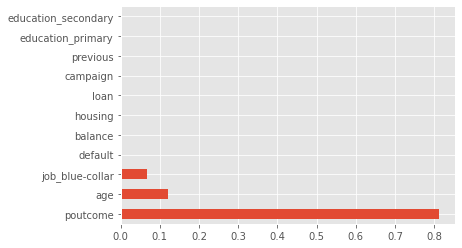

In [69]:
pd.Series(model_dt.feature_importances_, index = df_bank_train.columns).nlargest(11).plot(kind='barh');

In [70]:
pd.DataFrame({'Реальные значения': y_test, 'Предсказанные значения': y_pred_dt}).head(10)

,Реальные значения,Предсказанные значения
3860,0,0
290,1,0
2174,0,0
4353,0,0
3105,0,0
1899,1,0
3124,0,0
1568,0,0
4222,0,0
2561,0,0


In [71]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1601
           1       0.57      0.11      0.19       208

    accuracy                           0.89      1809
   macro avg       0.74      0.55      0.56      1809
weighted avg       0.86      0.89      0.85      1809



Как видно из сводной таблицы, метрика precision для нашего искомого параметра в данном случае достигает 57%. Подобный показатель намного выше, чем то, что было в предыдущем случае, но для нас этого пока недостаточно. Следовательно необходимо использовать заключительный метод.

## Случайный лес

In [72]:
from sklearn.ensemble import RandomForestClassifier

Выполняем Grid search. Первый этап поиска осуществлялся в диапозоне от нуля до 300 с шагом 5. Последующий поиск производился в заданном диапозоне

In [ ]:
model_3 = RandomForestClassifier(criterion = 'gini')
param_grid_3 = {'max_depth':np.arange(0,10,1), 'n_estimators':np.arange(0,45,1)}

# Задаём разбиение данных на лёрн и тест n_splits раз. Для каждого такого разбиения будет. Кросс-Валидация в соотношении к обучащей 
kfold = StratifiedKFold(n_splits=17, shuffle=True, random_state=42)

grid_search_3 = GridSearchCV(model_3, param_grid_3, scoring="precision", cv=kfold, verbose=2, n_jobs=-1)
grid_result_3 = grid_search_3.fit(X_train, y_train)

In [74]:
grid_result_3.best_score_

0.8473389355742297

Наилучший результат достигается при следующих параметрах:

In [75]:
grid_result_3.best_params_

{'max_depth': 5, 'n_estimators': 33}

In [76]:
model_rf = RandomForestClassifier(random_state = 42, n_estimators = 12, criterion ='gini', max_depth = 5, min_samples_split=17)

In [77]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=17, n_estimators=12,
                       random_state=42)

In [78]:
y_pred_rf = model_rf.predict(X_test)

### Проведем оценивание

In [79]:
pd.DataFrame({'Реальные значения': y_test, 'Предсказанные значения': y_pred_rf}).head(10)

,Реальные значения,Предсказанные значения
3860,0,0
290,1,0
2174,0,0
4353,0,0
3105,0,0
1899,1,0
3124,0,0
1568,0,0
4222,0,0
2561,0,0


In [80]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1601
           1       0.73      0.04      0.07       208

    accuracy                           0.89      1809
   macro avg       0.81      0.52      0.51      1809
weighted avg       0.87      0.89      0.84      1809



In [81]:
pd.DataFrame({'feature': df_bank_train.columns,
              'importance': model_rf.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
7,poutcome,0.315027
0,age,0.181764
6,previous,0.165378
2,balance,0.092772
3,housing,0.042381
5,campaign,0.028803
20,job_retired,0.019367
13,marital_married,0.017321
16,job_blue-collar,0.014988
19,job_management,0.014433


<AxesSubplot:>

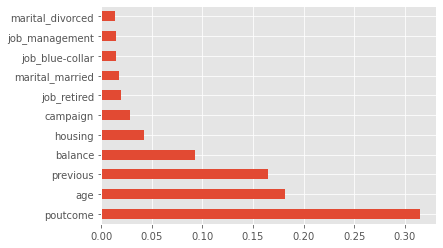

[CV] END .......................max_depth=7, n_estimators=44; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=12; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=12; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=12; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=12; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=12; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=12; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=12; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=12; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=15; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=15; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=15; total time=   0.0s
[CV] END ...................

[CV] END .......................max_depth=8, n_estimators=18; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=18; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=18; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=18; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=18; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=21; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=21; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=21; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=21; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=21; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=21; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=22; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=7, n_estimators=37; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=37; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=37; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=37; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=37; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=37; total time=   0.2s
[CV] END .......................max_depth=7, n_estimators=37; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=41; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=41; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=41; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=41; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=41; total time=   0.1s
[CV] END ...................

In [82]:
pd.Series(model_rf.feature_importances_, index = df_bank_train.columns).nlargest(11).plot(kind = 'barh')

Как видно из сводной таблицы, метрика precision для нашего искомого параметра в данном случае <b>достигает 73%</b>. Подобный показатель превышает результат, полученный при использовании метода "Дерево решений". Данный показатель является достаточно сильным результатом. Можно заметить, что наибольшее влияние на формирование результата влияет показатель "poutcome", а так же возраст и показатель предыдущего звонка